In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import category_encoders as ce

date_format = "%m/%d/%Y"

<h1>I. Data Understanding</h1>
<p>Bla bla bla</p>

<h1>II. Data Preparation</h1>
<p>We put together all preparations done in the previous file in a function, so we can execute again</p>

In [2]:
def dataProcessing(file):
    df_prep = pd.read_excel(file, index_col="Custid")

    #Creating columns for age and days as a Customer instead of using the regular values
    df_prep['Age'] = 2020 - df_prep['Year_Birth']
    df_prep['DaysAsCustomer'] = (datetime.strptime('03/18/2021', date_format) - df_prep['Dt_Customer']).dt.days

    #Changing the columns teenhome and kidhome to boolean
    df_prep["Kidhome"] = np.where(df_prep["Kidhome"] == 0, df_prep["Kidhome"], 1)
    df_prep["Teenhome"] = np.where(df_prep["Teenhome"] == 0, df_prep["Teenhome"], 1)
    #Creating new column to know if the person has kid, teen, both or none
    df_prep["Children"] = df_prep["Kidhome"] + df_prep["Teenhome"]

    #Creating a total acceptance column and droping the previous ones
    df_prep["AcceptCmpTotal"] = df_prep["AcceptedCmp1"] + df_prep["AcceptedCmp2"] + df_prep["AcceptedCmp3"] + df_prep["AcceptedCmp4"] + df_prep["AcceptedCmp5"]

    #Droping original columns
    df_prep.drop(['Year_Birth', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Teenhome', 'Kidhome', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

    #Droping the columns for group identification
    df_prep.drop(['Group', 'Element1', 'Element2', 'Element3', 'Element4', 'Element5'], axis=1, inplace=True)

    #Removing outliers
    incomeCap = 150000
    dealPurCap = 12
    webPurCap = 20

    df_prep = df_prep[df_prep["Income"] < incomeCap]
    df_prep = df_prep[df_prep["NumDealsPurchases"] < dealPurCap]
    df_prep = df_prep[df_prep["NumWebPurchases"] < webPurCap]

    #Filling NaN on MntSecurity_Systems and MntPremium by 0
    df_prep['MntSecurity_Systems'].fillna(0, inplace=True)
    df_prep['MntPremium'].fillna(0, inplace=True)

    #Loggin the Mnt Values
    df_prep["logLighting"] = np.where(df_prep["MntLighting"] == 0, df_prep["MntLighting"], np.log(df_prep["MntLighting"]))
    df_prep["logCameras"] = np.where(df_prep["MntCameras"] == 0, df_prep["MntCameras"], np.log(df_prep["MntCameras"]))
    df_prep["logDoor_Locks"] = np.where(df_prep["MntDoor_Locks"] == 0, df_prep["MntDoor_Locks"], np.log(df_prep["MntDoor_Locks"]))
    df_prep["logThermostats"] = np.where(df_prep["MntThermostats"] == 0, df_prep["MntThermostats"], np.log(df_prep["MntThermostats"]))
    df_prep["logSecurity_Systems"] = np.where(df_prep["MntSecurity_Systems"] == 0, df_prep["MntSecurity_Systems"], np.log(df_prep["MntSecurity_Systems"]))
    df_prep["logPremium"] = np.where(df_prep["MntPremium"] == 0, df_prep["MntPremium"], np.log(df_prep["MntPremium"]))

    #Creating a column with the sum of the Mnt Values
    df_prep["logTotal"] = df_prep["logLighting"] + df_prep["logCameras"] + df_prep["logDoor_Locks"] + df_prep["logThermostats"] + df_prep["logSecurity_Systems"] + df_prep["logPremium"]

    #Dropping the original monetary coumns
    mntCols = ['MntLighting','MntCameras', 'MntDoor_Locks', 'MntThermostats', 'MntSecurity_Systems', 'MntPremium']
    df_prep.drop(columns=mntCols, axis=1, inplace=True)

    #Dealing with Categorical Columns
    educationDict = {
    'Master': 'Pos-Graduated',
    'PhD': 'Pos-Graduated',
    'Graduation': 'Graduated-2n Cycle',
    '2n Cycle': 'Graduated-2n Cycle'
    }
    maritalStatusDict = {
        'Divorced': 'Single',
        'Single': 'Single',
        'Widow': 'Single',
        'Together': 'Togheter',
        'Married': 'Togheter'
    }
    df_prep['Education'] = df_prep['Education'].replace(educationDict)
    df_prep['Marital_Status'] = df_prep['Marital_Status'].replace(maritalStatusDict)

    # Enconding the columns that are strings or categorical
    colsToEncode = ["Education", "Marital_Status"]
    dummies = pd.get_dummies(df_prep[colsToEncode])
    df_prep = pd.concat([df_prep, dummies], axis=1)

    # Deleting the older columns
    df_prep.drop(columns=colsToEncode, inplace=True)

    return df_prep

In [3]:
campaign = "Group35_SmartHome_Campaign.xlsx"

df_campaign = dataProcessing(campaign)

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs

In [4]:
len(df_campaign)

2444

In [5]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2444 entries, 350001144 to 350011119
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Income                        2444 non-null   float64
 1   Recency                       2444 non-null   int64  
 2   NumDealsPurchases             2444 non-null   int64  
 3   NumWebPurchases               2444 non-null   int64  
 4   NumCatalogPurchases           2444 non-null   int64  
 5   NumStorePurchases             2444 non-null   int64  
 6   NumWebVisitsMonth             2444 non-null   int64  
 7   Complain                      2444 non-null   int64  
 8   DepVar                        2444 non-null   int64  
 9   Age                           2444 non-null   int64  
 10  DaysAsCustomer                2444 non-null   int64  
 11  Children                      2444 non-null   int64  
 12  AcceptCmpTotal                2444 non-null   int

<h1>Modeling</h1>

In [6]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import collections

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

<h4>Useful Functions</h4>

In [8]:
def get_revenue(y_test, y_pred, revenue, cost):
    from sklearn.metrics import confusion_matrix 
    cm = confusion_matrix(y_test, y_pred)
    total_revenue = (cm[1][1]) * revenue
    return total_revenue

In [9]:
def get_profit(y_test, y_pred, revenue, cost):
    from sklearn.metrics import confusion_matrix 
    cm = confusion_matrix(y_test, y_pred)
    total_cost = (cm[0][1] + cm[1][1]) * cost
    total_revenue = (cm[1][1]) * revenue
    profit = total_revenue - total_cost
    return profit

In [10]:
def get_cost(y_test, y_pred, revenue, cost):
    from sklearn.metrics import confusion_matrix 
    cm = confusion_matrix(y_test, y_pred)
    total_cost = (cm[0][1] + cm[1][1]) * cost
    return total_cost

In [11]:
def get_roi(y_test, y_pred, revenue, cost):
    from sklearn.metrics import confusion_matrix 
    cm = confusion_matrix(y_test, y_pred)
    total_cost = (cm[0][1] + cm[1][1]) * cost
    total_revenue = (cm[1][1]) * revenue
    roi = (total_revenue / total_cost) * 100
    return roi

In [12]:
def print_classification(y_test, y_pred_test):
    from sklearn.metrics import classification_report, confusion_matrix
    # Classification Report
    print(classification_report(y_test, y_pred_test))
    
    # Plot
    cm = confusion_matrix(y_test, y_pred_test)

    plt.figure(figsize = (5,3))
    ax = sns.heatmap(cm, annot=True, fmt='g', cmap = 'Blues')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

<h3>X & y | Train/Test Split</h3>

In [13]:
X = df_campaign.copy(deep=True)

y = X["DepVar"]

X.drop("DepVar", axis=1, inplace=True)

In [14]:
# Split the dataset intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 123, stratify=y)

Counter({0: 1594, 1: 239})
0    0.869613
1    0.130387
Name: DepVar, dtype: float64


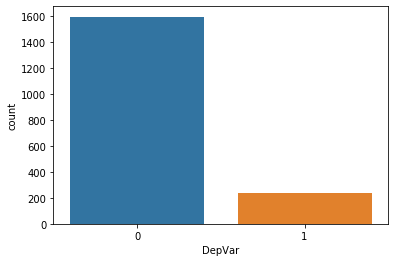

In [15]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
sns.countplot(x="DepVar", data=pd.DataFrame(data={'DepVar':y_train}))
print(y_train.value_counts(normalize=True))

Counter({0: 1594, 1: 1594})


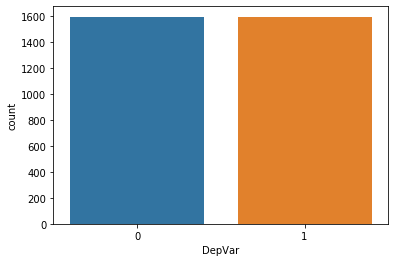

In [16]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train2, y_train2 = sm.fit_resample(X_train, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
sns.countplot(x="DepVar", data=pd.DataFrame(data={'DepVar':y_train2}))

<h2>Tunning the Model</h2>

In [17]:
from sklearn.model_selection import GridSearchCV 
# Execute Grid Search to hyper tune parameters
# This operation can take a long time to run (at least 5 minutes)
# For list of partameters check https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
grid_param = [{'n_estimators': [100,200,300,400,500],
          'max_depth':[5, 6, 8, 9, 12, 15],
          'min_samples_leaf':[2, 3, 4, 5, 7, 10],
          'random_state':[123]}]
classModel = RandomForestClassifier()
grid = GridSearchCV(classModel, grid_param, cv=5)
grid.fit(X_train2, y_train2)
print("Grid search best parameters: {}".format(grid.best_params_))

Grid search best parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 300, 'random_state': 123}


In [65]:
 thresholdPerformance = pd.DataFrame({'Threshold': pd.Series([], dtype='string'),
                        'Revenue': pd.Series([], dtype='float64'),
                        'Cost': pd.Series([], dtype='float64'),
                        'Profit': pd.Series([], dtype='float64'),
                        'ROI': pd.Series([], dtype='float64'),
                        'FPR': pd.Series([], dtype='float64'),
                        'FNR': pd.Series([], dtype='float64')
                        })

#Calculating the best threshold
T = range(1,7)
for t in T:
    t = t/10
    
    # Create and train the model
    dt_randFlor = RandomForestClassifier(**grid.best_params_)
    dt_randFlor.fit(X_train2, y_train2)
    model = dt_randFlor.fit(X_train2, y_train2)

    # predict y for X_train and X_test
    y_pred_train = (dt_randFlor.predict_proba(X_train)[:,1] >= t).astype(bool)
    y_pred_test = (dt_randFlor.predict_proba(X_test)[:,1] >= t).astype(bool)

    rev = get_revenue(y_test, y_pred_test, 14, 4)
    cost = get_cost(y_test, y_pred_test, 14, 4)
    profity = get_profit(y_test, y_pred_test, 14, 4)
    roi = get_roi(y_test, y_pred_test, 14, 4)

    cm = confusion_matrix(y_test,y_pred_test)

    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]

    thresholdPerformance = thresholdPerformance.append({'Threshold': t,
                        'Revenue': rev,
                        'Cost': cost,
                        'Profit': profity,
                        'ROI': roi,
                        'FPR': FP/(TN + FP)*100,
                        'FNR': FN/(TP + FN)*100
                        }, ignore_index=True)

In [66]:
thresholdPerformance

,Threshold,Revenue,Cost,Profit,ROI,FPR,FNR
0,0.1,1092.0,1356.0,-264.0,80.530973,49.060150,1.265823
1,0.2,1078.0,864.0,214.0,124.768519,26.127820,2.531646
2,0.3,952.0,564.0,388.0,168.794326,13.721805,13.924051
3,0.4,812.0,400.0,412.0,203.000000,7.894737,26.582278
4,0.5,588.0,284.0,304.0,207.042254,5.451128,46.835443
5,0.6,392.0,168.0,224.0,233.333333,2.631579,64.556962


<h3>Create Model</h3>

According to the modeling trainning, the best fit for the Random Forest would be:
- Min Sample Leaf = 2
- Max Depth = 15
- N Estimators: 300
- Threshold = 0.4

In [114]:
# Create and train the model
dt_randFlor = RandomForestClassifier(**grid.best_params_)
dt_randFlor.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, n_estimators=300,
                       random_state=123)

<h3>Prediction (y_test, y_train)</h3>

In [115]:
model = dt_randFlor.fit(X_train2, y_train2)

# predict y for X_train and X_test

y_pred_train = (dt_randFlor.predict_proba(X_train2)[:,1] >= 0.3).astype(bool)
y_pred_test = (dt_randFlor.predict_proba(X_test)[:,1] >= 0.3).astype(bool)

<h2>Evaluate the Model</h2>

<h3>Confusion Matrix</h3>

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1594
           1       0.97      1.00      0.99      1594

    accuracy                           0.99      3188
   macro avg       0.99      0.99      0.99      3188
weighted avg       0.99      0.99      0.99      3188



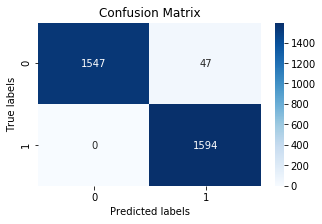

In [116]:
# TRAIN RESULTS
print_classification(y_train2,y_pred_train)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       532
           1       0.48      0.86      0.62        79

    accuracy                           0.86       611
   macro avg       0.73      0.86      0.77       611
weighted avg       0.91      0.86      0.88       611



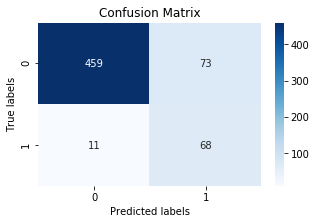

In [117]:
# TEST RESULTS
print_classification(y_test,y_pred_test)

In [118]:
cm = confusion_matrix(y_test,y_pred_test)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print('False Positive Rate (Lower the better): {} %'.format(FP/(TN + FP)*100))
print('False Negative Rate (Lower the better): {} %'.format(FN/(TP + FN)*100))

False Positive Rate (Lower the better): 13.721804511278195 %
False Negative Rate (Lower the better): 13.924050632911392 %


<h3>ROI Analysis</h3>

In [119]:
# Analysing the share of users impacted and conversions captured

impactedClients = TP + FP
impactedConversion = TP
allConversion = TP + FN
allClients = len(X_test)

print('Share of selected clients: {} %'.format(impactedClients / allClients * 100))
print('Share of conversions predicted: {} %'.format(impactedConversion / allConversion * 100))

Share of selected clients: 23.076923076923077 %
Share of conversions predicted: 86.07594936708861 %


In [120]:
cost = 4
revenue = 14

In [121]:
# By default [Sending everycustomer an promotion]

defaultCampaign = (sum(y_test)*revenue) - (cost * len(X_test))
defaultROI = ((sum(y_test)*revenue) / (cost * len(X_test))) * 100

print('Total Cost: {} €'.format(cost * len(X_test)))
print('Total Revenue: {} €'.format(sum(y_test)*revenue))
print('Total Profit: {} €'.format(defaultCampaign))
print('ROI: {}%'.format(defaultROI))

Total Cost: 2444 €
Total Revenue: 1106 €
Total Profit: -1338 €
ROI: 45.25368248772504%


In [122]:
# By applying the model

decisionTreeProfit = get_profit(y_test = y_test, y_pred = y_pred_test, revenue = revenue, cost = cost)
decisionTreeROI = get_roi(y_test = y_test, y_pred = y_pred_test, revenue = revenue, cost = cost)
decisionTreeCost = get_cost(y_test = y_test, y_pred = y_pred_test, revenue = revenue, cost = cost)
decisionTreeRevenue = get_revenue(y_test = y_test, y_pred = y_pred_test, revenue = revenue, cost = cost)

print('Total Cost: {} €'.format(decisionTreeCost))
print('Total Revenue: {} €'.format(decisionTreeRevenue))
print('Total Profit: {} €'.format(decisionTreeProfit))
print('ROI: {}%'.format(decisionTreeROI))

Total Cost: 564 €
Total Revenue: 952 €
Total Profit: 388 €
ROI: 168.79432624113474%


<h3>Measures of Performance</h3>

In [123]:
# Function to calculate MAPE metric
def mean_absolute_percentage_error(y_true, y_pred_test): 
    y_true, y_pred_test = np.array(y_true), np.array(y_pred_test)
    return np.mean(np.abs((y_true - y_pred_test) / y_true)) * 100

In [124]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [125]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


,Measure,Train,Test
0,MAE,0.014743,0.137480
1,RMSE,0.121420,0.370782
2,R^2,0.941029,-0.221186
3,MAPE (%),NaN,NaN
4,MAX Error,1.000000,1.000000


In [126]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain)]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [127]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.985257,0.862520
1,PRECISION,0.971359,0.482270
2,RECALL,1.000000,0.860759


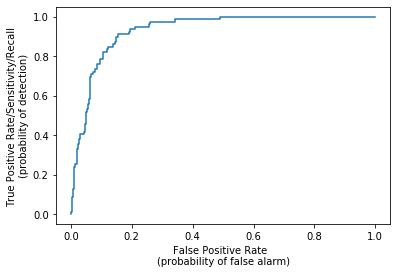

AUC:0.930
Optimal threshold:0.281


In [128]:
# ROC curve
probs = dt_randFlor.predict_proba(X_test)
FP,TP,thresholds = metrics.roc_curve(y_test,probs[:,1])
plt.plot(FP,TP,label="ROC")
plt.xlabel("False Positive Rate  \n(probability of false alarm)")
plt.ylabel("True Positive Rate/Sensitivity/Recall \n(probability of detection)")
cutoff=np.argmax(np.abs(TP-FP)) 
optimal_threshold = thresholds[cutoff]
plt.show()
print("AUC:{0:.3f}".format(metrics.auc(FP, TP)))
print("Optimal threshold:{0:.3f}".format(optimal_threshold))

In [129]:
# Get feature importance
importance = list(dt_randFlor.feature_importances_)
# Create tuples with variable and value
feature_importance = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importance)]
# Sort in descend order
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)
resultsDF = pd.DataFrame(data=feature_importance, columns=['Feature', 'Importance'])
resultsDF

,Feature,Importance
0,DaysAsCustomer,0.24
1,Marital_Status_Togheter,0.09
2,Income,0.06
3,NumStorePurchases,0.06
4,AcceptCmpTotal,0.05
5,Education_Graduated-2n Cycle,0.05
6,Children,0.04
7,logLighting,0.04
8,logSecurity_Systems,0.04
9,logPremium,0.04


# SCORING THE REAL DATA